# Prediction vs Confidence Intervals

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
# Load the Boston Housing dataset
datapath = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(datapath)

feature_names = ["crim","zn","indus","chas", "nox",
                 "rm","age","dis","rad","tax","ptratio",
                 "b","lstat"]

X = df[feature_names]
y = df[["medv"]]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X[feature_names[7:8]]).fit()

# Print the summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                   1.52e-146
Time:                        13:25:30   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [4]:
X[feature_names[7:8]][:2]

,dis
0,4.0900
1,4.9671


In [7]:
output = model.get_prediction(X[feature_names[7:8]]).summary_frame(0.05)
output

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.625730,0.528300,18.587793,20.663668,-5.165701,44.417162
1,23.834466,0.641594,22.573943,25.094989,-0.967282,48.636214
2,23.834466,0.641594,22.573943,25.094989,-0.967282,48.636214
3,29.089267,0.783047,27.550836,30.627699,4.271843,53.906691
4,29.089267,0.783047,27.550836,30.627699,4.271843,53.906691
...,...,...,...,...,...,...
501,11.893481,0.320158,11.264475,12.522486,-12.884199,36.671160
502,10.976493,0.295474,10.395984,11.557003,-13.800003,35.752990
503,10.400677,0.279973,9.850621,10.950734,-14.375124,35.176479
504,11.463058,0.308571,10.856816,12.069300,-13.314054,36.240170


__Plot it__

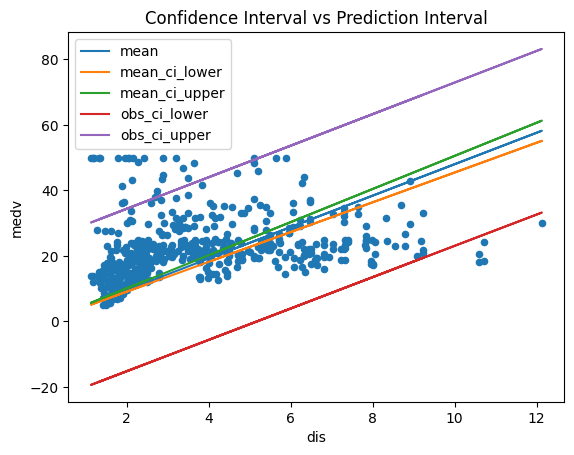

In [8]:
df_out = pd.concat([output.drop("mean_se",axis=1), 
                    X[feature_names[7:8]], 
                    y], 
                    axis=1)

# Plot
ax1=df_out.drop("medv", axis=1).plot(x="dis", title="Confidence Interval vs Prediction Interval")
df_out.plot(x="dis",y="medv",kind="scatter", ax=ax1);